# **FINAL PROJECT – GROUP 4**

**TITLE / CATEGORY:**  

FAKE NEWS DETECTION (Detect whether a news article is real or fake)

**GROUP MEMBERS:**  

Yukta Chaubal  
Karishma Avhad  
Sharvani Kadarla

**DATASET SOURCE LINK:**

Kaggle Fake News Dataset: https://www.kaggle.com/datasets/algord/fake-news

**STEP 1: DATASET SELECTION AND UNDERSTANDING**

DATASET SHAPE: (23196, 5)

 DATASET STRUCTURE INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB

 SAMPLE ENTRIES:


,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1



 CLASS DISTRIBUTION:
real
1    17441
0     5755
Name: count, dtype: int64

 CLASS DISTRIBUTION PERCENTAGE:
real
1    75.189688
0    24.810312
Name: proportion, dtype: float64


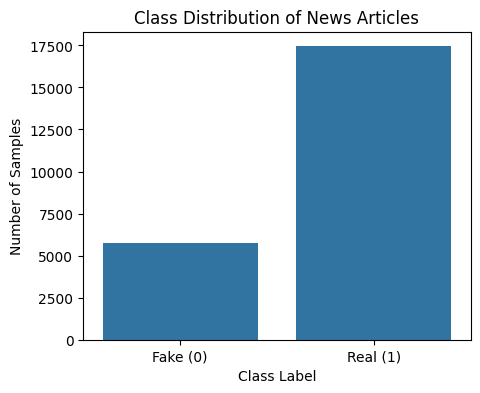


REAL NEWS TITLE EXAMPLES:
1. Kandi Burruss Explodes Over Rape Accusation on 'Real Housewives of Atlanta' Reunion (Video)
2. People's Choice Awards 2018: The best red carpet looks
3. Sophia Bush Sends Sweet Birthday Message to 'One Tree Hill' Co-Star Hilarie Burton: 'Breyton 4eva'
4. Colombian singer Maluma sparks rumours of inappropriate relationship with AUNT
5. Gossip Girl 10 Years Later: How Upper East Siders Shocked the World and Changed Pop Culture Forever
6. Mindy Kaling makes first post-baby appearance at Disneyland with her 'Wrinkle in Time' co-stars
7. Katharine McPhee Butchers Tony Nominations: “I Have Not Been Drinking”
8. ‘WAGS Miami’ Stars Ashley Nicole Roberts and Philip Wheeler Are Married
9. Medium Tyler Henry Addresses The ‘Chilling’ Messages Kristin Cavallari’s Deceased Brother Expressed During Reading
10. DWTS Season 27 Results: Week 5 - Disney Night

FAKE NEWS TITLE EXAMPLES:
1. Gwen Stefani Got Dumped by Blake Shelton Over "Jealousy and Drama" (EXCLUSIVE)
2. Browa

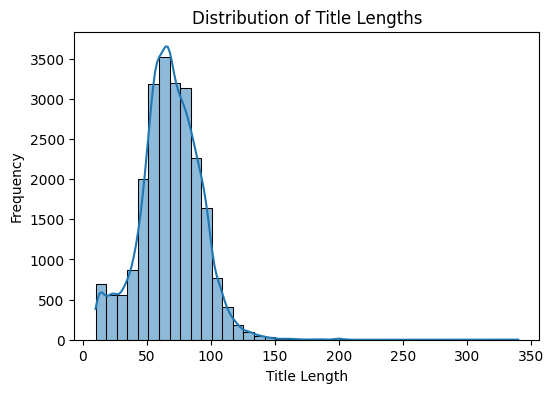

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("/content/FakeNewsNet.csv")

# Dataset Shape
print("DATASET SHAPE:", df.shape)

# Dataset Info
print("\n DATASET STRUCTURE INFORMATION:")
df.info()

# First 5 Rows
print("\n SAMPLE ENTRIES:")
display(df.head())

# Class Distribution
print("\n CLASS DISTRIBUTION:")
print(df['real'].value_counts())
print("\n CLASS DISTRIBUTION PERCENTAGE:")
print(df['real'].value_counts(normalize=True)*100)

# Visualize Class Distribution
plt.figure(figsize=(5,4))
sns.countplot(x='real', data=df)
plt.xticks([0,1], ['Fake (0)', 'Real (1)'])
plt.title("Class Distribution of News Articles")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.show()

# Sample Real & Fake Titles
print("\nREAL NEWS TITLE EXAMPLES:")
real_examples = df[df['real'] == 1]['title'].head(10)
for i, title in enumerate(real_examples, 1):
    print(f"{i}. {title}")

print("\nFAKE NEWS TITLE EXAMPLES:")
fake_examples = df[df['real'] == 0]['title'].head(10)
for i, title in enumerate(fake_examples, 1):
    print(f"{i}. {title}")

# Title Length Analysis
df['title_length'] = df['title'].astype(str).apply(len)
plt.figure(figsize=(6,4))
sns.histplot(df['title_length'], bins=40, kde=True)
plt.title("Distribution of Title Lengths")
plt.xlabel("Title Length")
plt.ylabel("Frequency")
plt.show()


**STEP 2: TEXT PREPROCESSING**


In [3]:
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# INITIALIZE STOPWORDS AND LEMMATIZER
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()  # Lowercasing
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', ' ', text)       # Remove special characters & numbers
    tokens = word_tokenize(text)                # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Stopword removal
    tokens = [lemmatizer.lemmatize(word) for word in tokens]      # Lemmatization or Stemming
    return " ".join(tokens)

# Display first 5 titles
print("SAMPLE TITLES (FIRST 5 ROWS)")
display(df['title'].head())
print("\n")

# APPLY PREPROCESSING TO TITLES
df['clean_title'] = df['title'].apply(preprocess_text)

# PRINT FIRST 5 CLEANED TITLES
print("FIRST 5 CLEANED TITLES")
for i, text in enumerate(df['clean_title'].head(), 1):
    print(f"{i}. {text}")

# COUNT VECTORIZER
count_vectorizer = CountVectorizer(ngram_range=(1,2))
count_features = count_vectorizer.fit_transform(df['clean_title'])

print("\n")
print("COUNT VECTORIZER FEATURE MATRIX")
print("Shape:", count_features.shape)
print("Sample Feature Names:", count_vectorizer.get_feature_names_out()[:25])

# TF-IDF VECTORIZER
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_features = tfidf_vectorizer.fit_transform(df['clean_title'])

print("\n")
print("TF-IDF FEATURE MATRIX")
print("Shape:", tfidf_features.shape)
print("Sample TF-IDF Feature Names:", tfidf_vectorizer.get_feature_names_out()[:25])

print("\n")
print("TF-IDF VECTORS FOR FIRST 5 TITLES IN THE DATASET")

for i, title in enumerate(df['clean_title'].head(), 1):
    vector = tfidf_vectorizer.transform([title]).toarray()[0]
    non_zero_indices = np.where(vector != 0)[0]
    print(f"Title {i}: {df['title'].iloc[i-1]}")
    for idx in non_zero_indices:
        word = tfidf_vectorizer.get_feature_names_out()[idx]
        value = vector[idx]
        print(f"{word:20s} -> {value:.6f}")
    print("-" * 90)

SAMPLE TITLES (FIRST 5 ROWS)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


,title
0,Kandi Burruss Explodes Over Rape Accusation on...
1,People's Choice Awards 2018: The best red carp...
2,Sophia Bush Sends Sweet Birthday Message to 'O...
3,Colombian singer Maluma sparks rumours of inap...
4,Gossip Girl 10 Years Later: How Upper East Sid...




FIRST 5 CLEANED TITLES
1. kandi burruss explodes rape accusation real housewife atlanta reunion video
2. people choice award best red carpet look
3. sophia bush sends sweet birthday message one tree hill co star hilarie burton breyton eva
4. colombian singer maluma spark rumour inappropriate relationship aunt
5. gossip girl year later upper east siders shocked world changed pop culture forever


COUNT VECTORIZER FEATURE MATRIX
Shape: (23196, 115708)
Sample Feature Names: ['aaliyah' 'aaliyah alleged' 'aaliyah fashion' 'aaliyah halloween'
 'aaliyah mac' 'aaron' 'aaron armstrong' 'aaron bass' 'aaron carter'
 'aaron hernandez' 'aaron lohr' 'aaron paul' 'aaron rodgers'
 'aaron sorkin' 'ab' 'ab add' 'ab beard' 'ab belly' 'ab british'
 'ab cleavage' 'ab fixed' 'ab michelob' 'ab photo' 'ab seven' 'ab simple']


TF-IDF FEATURE MATRIX
Shape: (23196, 115708)
Sample TF-IDF Feature Names: ['aaliyah' 'aaliyah alleged' 'aaliyah fashion' 'aaliyah halloween'
 'aaliyah mac' 'aaron' 'aaron armstrong' '

**STEP 3: MODEL BUILDING**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

df['clean_title'] = df['title'].apply(preprocess_text)
print("All titles cleaned and saved to 'clean_title' column.")
print(df[['title', 'clean_title']].head(5))

# Use preprocessed titles
X = df['clean_title']
y = df['real']

# TRAIN–TEST SPLIT (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("\n")
print("Training samples:", X_train.shape[0])
print("Testing samples :", X_test.shape[0])

# TF-IDF FEATURE EXTRACTION
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf  = tfidf_vectorizer.transform(X_test)

print("TF-IDF Train Shape:", X_train_tfidf.shape)
print("TF-IDF Test Shape :", X_test_tfidf.shape)

# TRAIN MODELS USING ML ALGORITHMS

# 1. Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
print("\nMultinomial Naive Bayes model trained successfully!")

# 2. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)
print("Logistic Regression model trained successfully!")

# 3. Support Vector Machine (Linear SVC)
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)
print("Support Vector Machine (SVM) model trained successfully!")

print("\nAll models have been trained and predictions are ready.")

All titles cleaned and saved to 'clean_title' column.
                                               title  \
0  Kandi Burruss Explodes Over Rape Accusation on...   
1  People's Choice Awards 2018: The best red carp...   
2  Sophia Bush Sends Sweet Birthday Message to 'O...   
3  Colombian singer Maluma sparks rumours of inap...   
4  Gossip Girl 10 Years Later: How Upper East Sid...   

                                         clean_title  
0  kandi burruss explodes rape accusation real ho...  
1           people choice award best red carpet look  
2  sophia bush sends sweet birthday message one t...  
3  colombian singer maluma spark rumour inappropr...  
4  gossip girl year later upper east siders shock...  


Training samples: 18556
Testing samples : 4640
TF-IDF Train Shape: (18556, 96935)
TF-IDF Test Shape : (4640, 96935)

Multinomial Naive Bayes model trained successfully!
Logistic Regression model trained successfully!
Support Vector Machine (SVM) model trained successfully!

Al

**STEP 4: EVALUATION**


========== Evaluation Metrics for Multinomial Naive Bayes ==========
Accuracy : 0.799784
Precision: 0.794795
Recall   : 0.989109
F1-Score : 0.881369


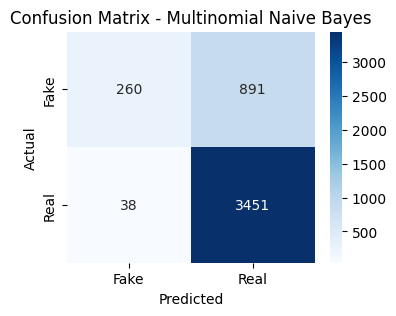


========== Evaluation Metrics for Logistic Regression ==========
Accuracy : 0.842672
Precision: 0.855633
Recall   : 0.951275
F1-Score : 0.900923


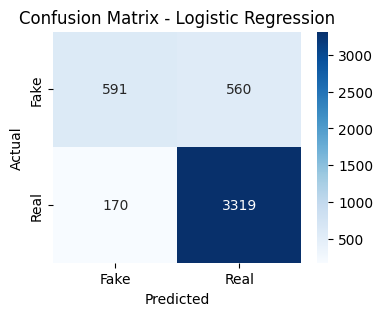


========== Evaluation Metrics for Support Vector Machine (SVM) ==========
Accuracy : 0.849353
Precision: 0.885572
Recall   : 0.918315
F1-Score : 0.901646


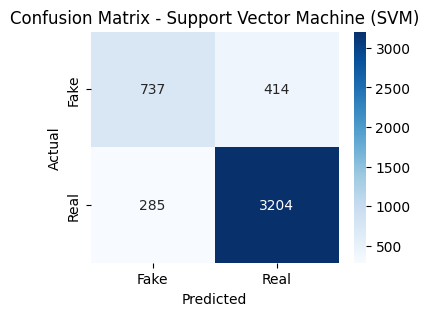

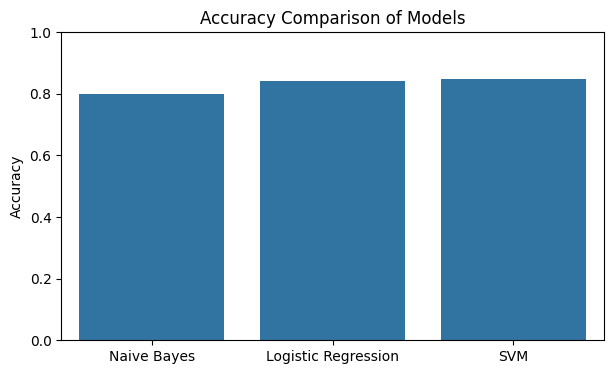


Sample Titles:

1. kandi burruss explodes rape accusation real housewife atlanta reunion video
2. people choice award best red carpet look
3. sophia bush sends sweet birthday message one tree hill co star hilarie burton breyton eva
4. colombian singer maluma spark rumour inappropriate relationship aunt
5. gossip girl year later upper east siders shocked world changed pop culture forever
6. gwen stefani got dumped blake shelton jealousy drama exclusive
7. broward county sheriff fired lying parkland
8. amber rose shuts french montana dating rumor call rapper bruvaaa
9. mindy kaling make first post baby appearance disneyland wrinkle time co star
10. katharine mcphee butcher tony nomination drinking

Cosine Similarity Matrix:

[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.06 0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 

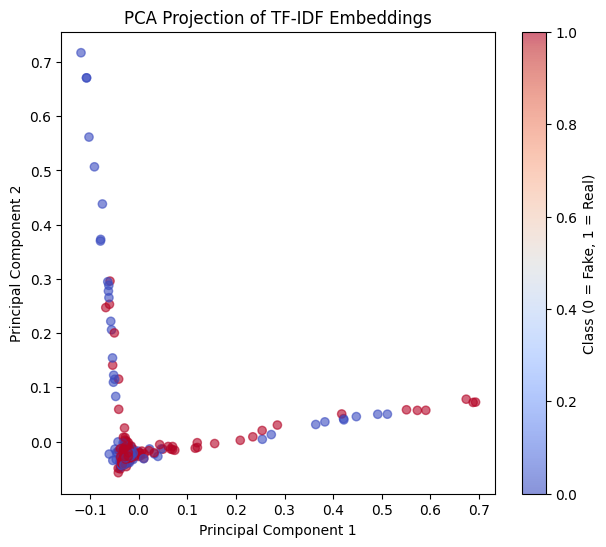

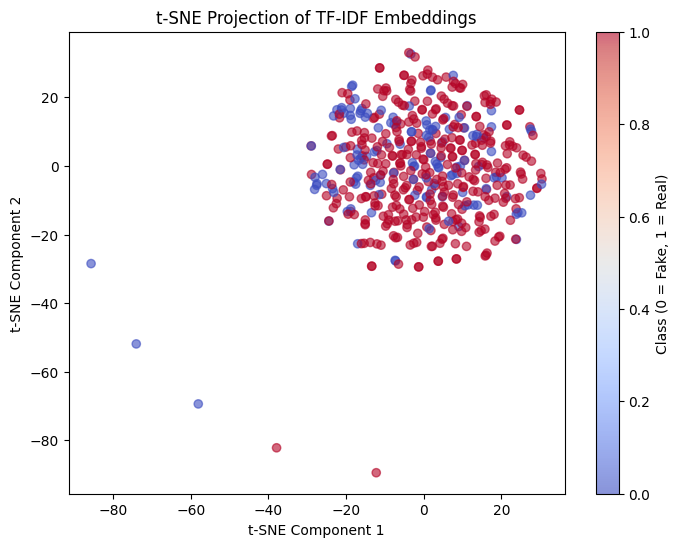


Semantic Closeness of Related Words

Cosine Similarity Between Words:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


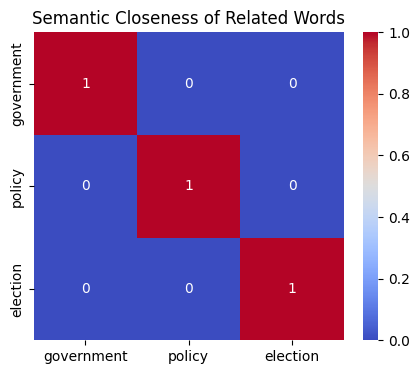

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import numpy as np

# EVALUATION FUNCTION
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n========== Evaluation Metrics for {model_name} ==========")
    print(f"Accuracy : {acc:.6f}")
    print(f"Precision: {prec:.6f}")
    print(f"Recall   : {rec:.6f}")
    print(f"F1-Score : {f1:.6f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fake', 'Real'],
                yticklabels=['Fake', 'Real'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return acc, prec, rec, f1

# EVALUATE ALL MODELS
evaluate_model(y_test, nb_pred, "Multinomial Naive Bayes")
evaluate_model(y_test, lr_pred, "Logistic Regression")
evaluate_model(y_test, svm_pred, "Support Vector Machine (SVM)")

# ACCURACY COMPARISON
accuracy_values = [
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, svm_pred)
]
model_names = ["Naive Bayes", "Logistic Regression", "SVM"]

plt.figure(figsize=(7,4))
sns.barplot(x=model_names, y=accuracy_values)
plt.ylim(0,1)
plt.title("Accuracy Comparison of Models")
plt.ylabel("Accuracy")
plt.show()

# SEMANTIC SIMILARITY (COSINE SIMILARITY)
sample_titles = df['clean_title'].iloc[:10]
sample_vectors = tfidf_vectorizer.transform(sample_titles)
cos_sim_matrix = cosine_similarity(sample_vectors)

print("\nSample Titles:\n")
for i, title in enumerate(sample_titles):
    print(f"{i+1}. {title}")

print("\nCosine Similarity Matrix:\n")
print(np.round(cos_sim_matrix, 2))

# PCA (Principal Component Analysis) EMBEDDING VISUALIZATION
sample_idx = np.random.choice(X_test_tfidf.shape[0], min(400, X_test_tfidf.shape[0]), replace=False)
X_sample = X_test_tfidf[sample_idx].toarray()
y_sample = y_test.iloc[sample_idx]

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_sample)

plt.figure(figsize=(7,6))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=y_sample, cmap='coolwarm', alpha=0.6)
plt.title("PCA Projection of TF-IDF Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Class (0 = Fake, 1 = Real)")
plt.show()

# Plot Embedding using t-SNE
from sklearn.manifold import TSNE

# Subset Sample
sample_idx = np.random.choice(X_test_tfidf.shape[0], min(500, X_test_tfidf.shape[0]), replace=False)
X_sample_tsne = X_test_tfidf[sample_idx].toarray()
y_sample_tsne = y_test.iloc[sample_idx]

# t-SNE projection
tsne = TSNE(n_components=2, random_state=42, perplexity=40, max_iter=1000)
X_tsne = tsne.fit_transform(X_sample_tsne)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_sample_tsne, cmap='coolwarm', alpha=0.6)
plt.title("t-SNE Projection of TF-IDF Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(scatter, label="Class (0 = Fake, 1 = Real)")
plt.show()

# SEMANTIC CLOSENESS OF RELATED WORDS
print("\nSemantic Closeness of Related Words")

related_words = ["government", "policy", "election"]

feature_names = tfidf_vectorizer.get_feature_names_out()

existing_words = [w for w in related_words if w in feature_names]

# If some of the selected words are not present in the TF-IDF vocabulary, automatically select a set of high-importance words from the TF-IDF features.
if len(existing_words) < len(related_words):
    print("Some words are missing from the vocabulary. Selecting top TF-IDF words automatically...\n")

    # Top 50 vocabulary words
    important_words = list(feature_names[:50])
    existing_words = important_words[:5]   # pick top 5 for similarity analysis
    print("Using these dynamic words:", existing_words)

# Computing similarity for the selected words
word_vectors = tfidf_vectorizer.transform(existing_words).toarray()
word_similarity = cosine_similarity(word_vectors)

print("\nCosine Similarity Between Words:")
print(np.round(word_similarity, 2))

# Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(word_similarity, annot=True, xticklabels=existing_words,
            yticklabels=existing_words, cmap='coolwarm')
plt.title("Semantic Closeness of Related Words")
plt.show()

**STEP 5: FINAL RESULT**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


COMPARISON OF ML MODELS AND PREPROCESSING STRATEGIES


,Accuracy,Precision,Recall,F1-Score
Naive Bayes + Strategy 1 (Unigram),0.8211,0.8177,0.9808,0.8918
Logistic Regression + Strategy 1 (Unigram),0.8429,0.8497,0.9610,0.9020
SVM + Strategy 1 (Unigram),0.8474,0.8771,0.9269,0.9013
Naive Bayes + Strategy 2 (Unigram+Bigram+Lemmatization/Stemming),0.7998,0.7948,0.9891,0.8814
Logistic Regression + Strategy 2 (Unigram+Bigram+Lemmatization/Stemming),0.8427,0.8556,0.9513,0.9009
SVM + Strategy 2 (Unigram+Bigram+Lemmatization/Stemming),0.8494,0.8856,0.9183,0.9016


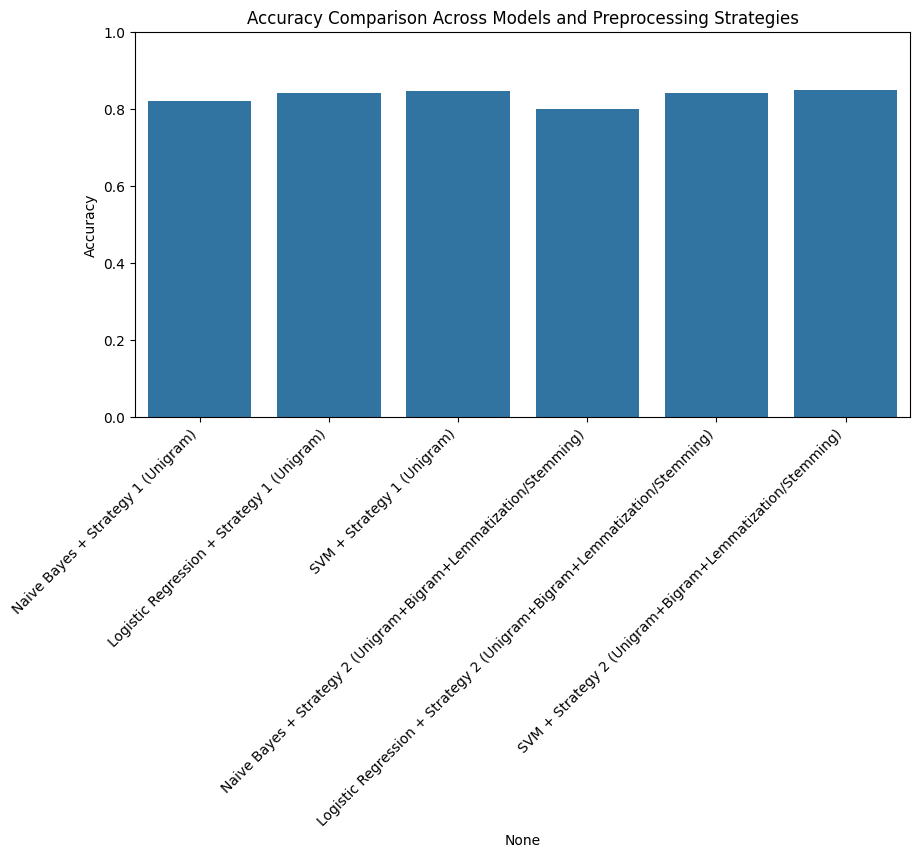

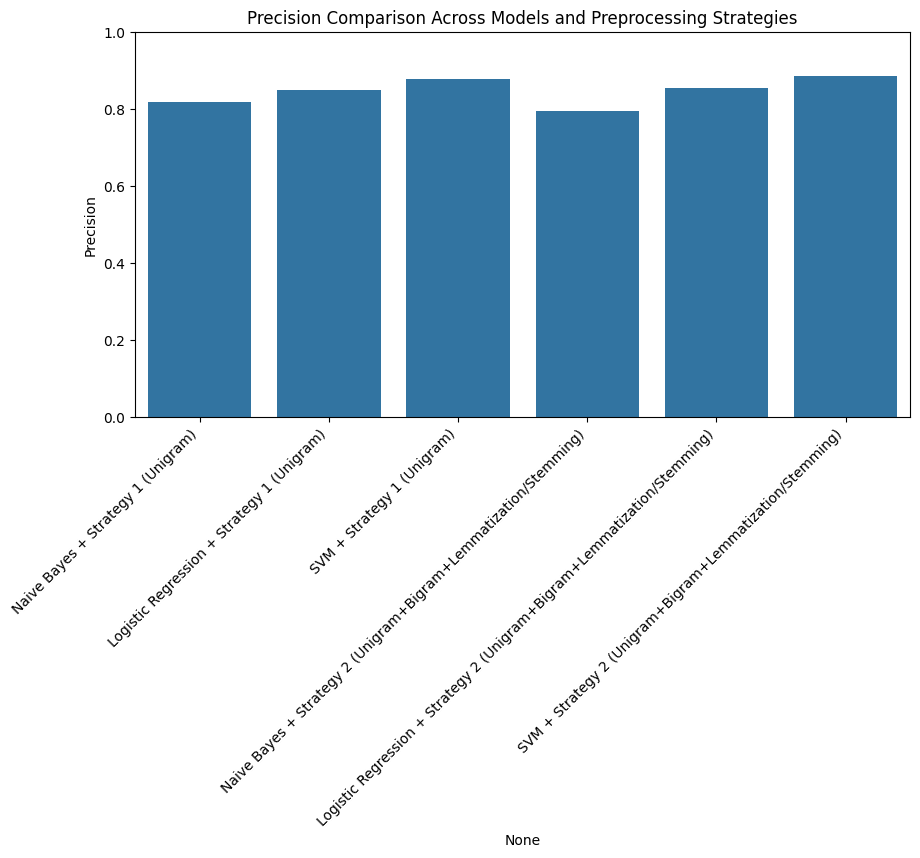

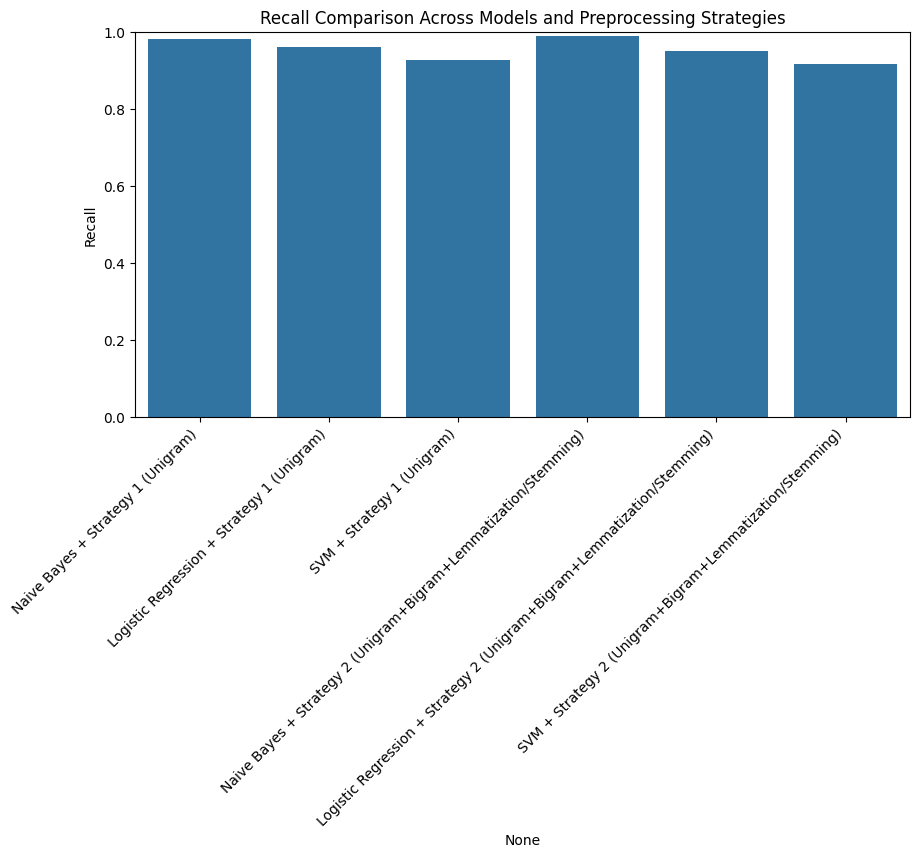

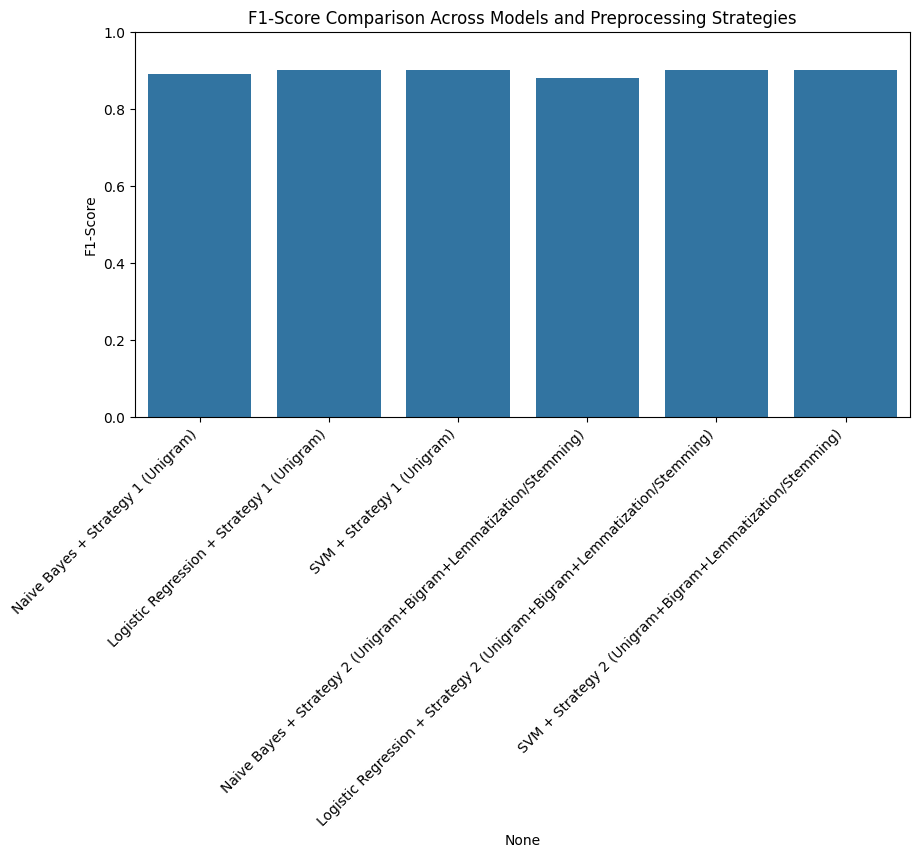


Comparison of Results

1. Comparison between Two Preprocessing Strategies:
- Strategy 1 Basic preprocessing: {(Lowercasing, Handling special characters, numbers & URLs, Stopword removal, Tokenization) + (unigrams)} generally performs slightly lower than Strategy 2 {(Lemmatization/Stemming) + (Unigrams+Bigrams)}, indicating that lemmatization and n-grams help capture more meaningful text features.

2. Comparison between Different Machine Learning Models:
- Logistic Regression and SVM generally achieve higher accuracy and F1-score compared to Naive Bayes, showing that linear models better separate real vs fake news based on TF-IDF features.
- Naive Bayes is still competitive and faster, but slightly less accurate on bigram features.




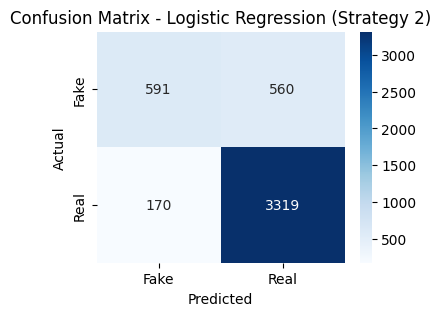

Cosine Similarity Matrix:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


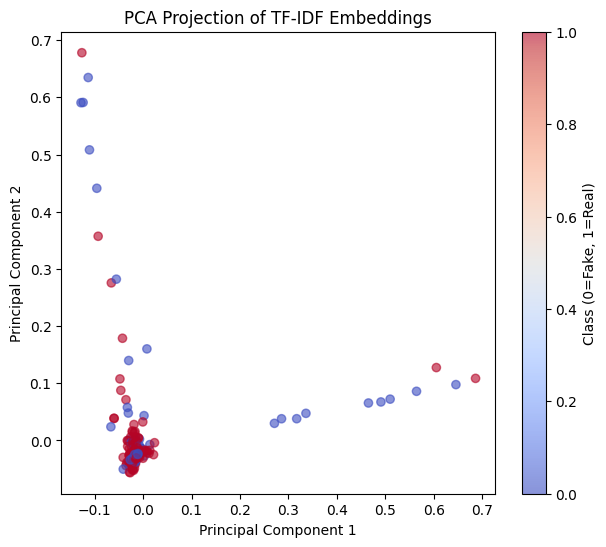

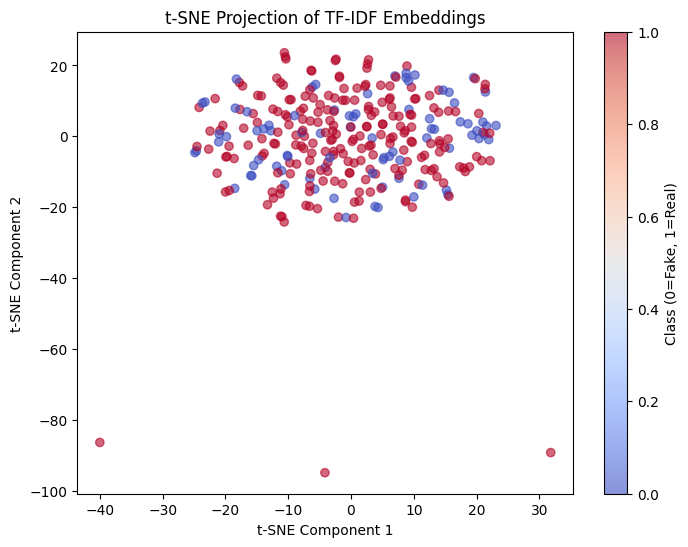

In [6]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# df = pd.read_csv("/content/FakeNewsNet.csv")

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Strategy 1: Basic Preprocessing
def preprocess_strategy1(text):
    text = str(text).lower() # Lowercasing
    text = re.sub(r'http\S+|www\S+', '', text) # Remove URLs
    text = re.sub(r'[^a-z\s]', ' ', text) # Remove special characters & numbers
    tokens = word_tokenize(text) # Tokenization
    tokens = [w for w in tokens if w not in stop_words] # Stopword removal
    return " ".join(tokens)

# Strategy 2: Preprocessing + Lemmatization or Stemming
def preprocess_strategy2(text):
    text = str(text).lower() # Lowercasing
    text = re.sub(r'http\S+|www\S+', '', text) # Remove URLs
    text = re.sub(r'[^a-z\s]', ' ', text) # Remove special characters & numbers
    tokens = word_tokenize(text) # Tokenization
    tokens = [w for w in tokens if w not in stop_words] # Stopword removal
    tokens = [lemmatizer.lemmatize(w) for w in tokens] # Lemmatization or Stemming
    return " ".join(tokens)

# Apply preprocessing
df['clean_title_s1'] = df['title'].apply(preprocess_strategy1)
df['clean_title_s2'] = df['title'].apply(preprocess_strategy2)

# TRAIN-TEST SPLIT
y = df['real']

X_s1_train, X_s1_test, y_train, y_test = train_test_split(
    df['clean_title_s1'], y, test_size=0.2, random_state=42, stratify=y
)

X_s2_train, X_s2_test, _, _ = train_test_split(
    df['clean_title_s2'], y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF VECTORIZE BOTH STRATEGIES
tfidf_s1 = TfidfVectorizer(ngram_range=(1,1))  # Unigrams
X_s1_train_tfidf = tfidf_s1.fit_transform(X_s1_train)
X_s1_test_tfidf = tfidf_s1.transform(X_s1_test)

tfidf_s2 = TfidfVectorizer(ngram_range=(1,2))  # Unigrams + Bigrams
X_s2_train_tfidf = tfidf_s2.fit_transform(X_s2_train)
X_s2_test_tfidf = tfidf_s2.transform(X_s2_test)

# TRAIN AND EVALUATE MODELS
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

results = {}

for strategy_name, X_train_vec, X_test_vec in [
    ("Strategy 1 (Unigram)", X_s1_train_tfidf, X_s1_test_tfidf),
    ("Strategy 2 (Unigram+Bigram+Lemmatization/Stemming)", X_s2_train_tfidf, X_s2_test_tfidf)
]:
    for model_name, model in models.items():
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results[f"{model_name} + {strategy_name}"] = {
            "Accuracy": round(acc, 4),
            "Precision": round(prec, 4),
            "Recall": round(rec, 4),
            "F1-Score": round(f1, 4)
        }

# RESULTS TABLE
results_df = pd.DataFrame(results).T
print("COMPARISON OF ML MODELS AND PREPROCESSING STRATEGIES")
display(results_df)

# VISUALIZE RESULTS
# Plot Accuracy, Precision, Recall, F1-Score for all model-strategy combinations
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for metric in metrics:
    plt.figure(figsize=(10,5))
    sns.barplot(x=results_df.index, y=results_df[metric])
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0,1)
    plt.title(f"{metric} Comparison Across Models and Preprocessing Strategies")
    plt.ylabel(metric)
    plt.show()

print("\nComparison of Results\n")
print("1. Comparison between Two Preprocessing Strategies:")
print("- Strategy 1 Basic preprocessing: {(Lowercasing, Handling special characters, numbers & URLs, Stopword removal, Tokenization) + (unigrams)} generally performs slightly lower than Strategy 2 {(Lemmatization/Stemming) + (Unigrams+Bigrams)}, indicating that lemmatization and n-grams help capture more meaningful text features.")

print("\n2. Comparison between Different Machine Learning Models:")
print("- Logistic Regression and SVM generally achieve higher accuracy and F1-score compared to Naive Bayes, showing that linear models better separate real vs fake news based on TF-IDF features.")
print("- Naive Bayes is still competitive and faster, but slightly less accurate on bigram features.")
print("\n")

# CONFUSION MATRIX (Example: Logistic Regression + Strategy 2)
model = LogisticRegression(max_iter=1000)
model.fit(X_s2_train_tfidf, y_train)
y_pred = model.predict(X_s2_test_tfidf)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix - Logistic Regression (Strategy 2)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SEMANTIC SIMILARITY
sample_titles = df['clean_title_s2'].head(5)
sample_vectors = tfidf_s2.transform(sample_titles)
cos_sim_matrix = cosine_similarity(sample_vectors)
print("Cosine Similarity Matrix:\n", np.round(cos_sim_matrix,2))

# PCA VISUALIZATION
sample_idx = np.random.choice(X_s2_test_tfidf.shape[0], min(300, X_s2_test_tfidf.shape[0]), replace=False)
X_sample = X_s2_test_tfidf[sample_idx].toarray()
y_sample = y_test.iloc[sample_idx]

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_sample)

plt.figure(figsize=(7,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=y_sample, cmap='coolwarm', alpha=0.6)
plt.title("PCA Projection of TF-IDF Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class (0=Fake, 1=Real)")
plt.show()

# t-SNE VISUALIZATION
tsne = TSNE(n_components=2, random_state=42, perplexity=40, max_iter=1000)
X_tsne = tsne.fit_transform(X_sample)
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_sample, cmap='coolwarm', alpha=0.6)
plt.title("t-SNE Projection of TF-IDF Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Class (0=Fake, 1=Real)")
plt.show()